# *Case Study : Predicting Leads*

# *Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#  *Importing of Data*

In [2]:
#Reading dataset and storing it into a variable named df
import requests
from io import StringIO

url = 'https://drive.google.com/file/d/1AdHAvnXqw83g2a-76Fzu3kkCVcwEl2nF/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

# *Inspecting the DataFrame*

In [3]:
#Verifying first 5 records using head function
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#Verifying last 5 records using tail function
df.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

In [5]:
#Checking for the dimensions of the dataset
df.shape

# Observation:
# Total records - 9240
# Total features - 37

(9240, 37)

In [6]:
#Understanding the features , data types and not null records
df.info()

#Observation : 
# Records: 9240 entries
# Columns : 37 columns
# dtypes used : float64(4), int64(3), object(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking for the stastical data
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
#Checking the correlation between Converted column and all other numerical features
df.corr()['Converted']

Lead Number                    0.025157
Converted                      1.000000
TotalVisits                    0.030395
Total Time Spent on Website    0.362483
Page Views Per Visit          -0.003328
Asymmetrique Activity Score    0.167962
Asymmetrique Profile Score     0.218571
Name: Converted, dtype: float64

# *Data Preprocessing*

## *1. Duplicate Records*

In [9]:
#Checking for duplicate records
df.duplicated().sum()

# Observations:
# No duplicate records are present

0

## *2. Feature Selection*

<AxesSubplot:ylabel='Converted'>

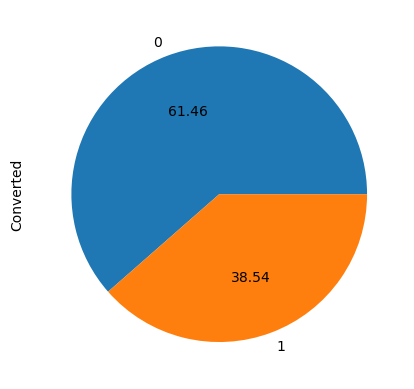

In [10]:
#checking the percentage of Converted value percentage with pie chart

df['Converted'].value_counts().plot(kind='pie',autopct='%.2f')

In [11]:
#Checking unique values for analysis
df['Lead Origin'].value_counts()

# Observations : 
# Lead origin column has 5 unqiue categories.
# This column will help us to know the origin of each lead
# This will help us to focus which origin category we should focus more for hot leads

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [12]:
#Checking unique values for analysis
df['Lead Source'].value_counts()

# Observations : 
# Lead source column has 21 unqiue categories.
# This column will help us to know the source of each lead
# This will help us to focus which source category we should focus more for hot leads

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
#Checking unique values for analysis
df['Do Not Email'].value_counts()

# Observations : 
# 'Do Not Email feature has 2 unqiue categories.
# This feature has imbalanced data

No     8506
Yes     734
Name: Do Not Email, dtype: int64

<AxesSubplot:ylabel='Do Not Email'>

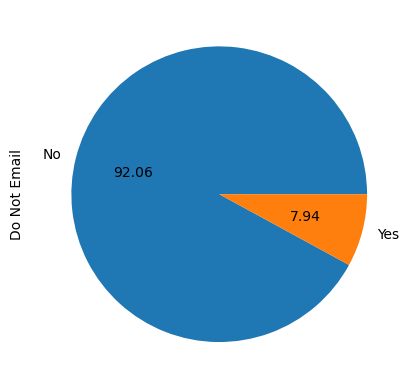

In [14]:
#checking the percentage of Do Not Email value percentage with pie chart

df['Do Not Email'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:xlabel='Converted', ylabel='Do Not Email'>

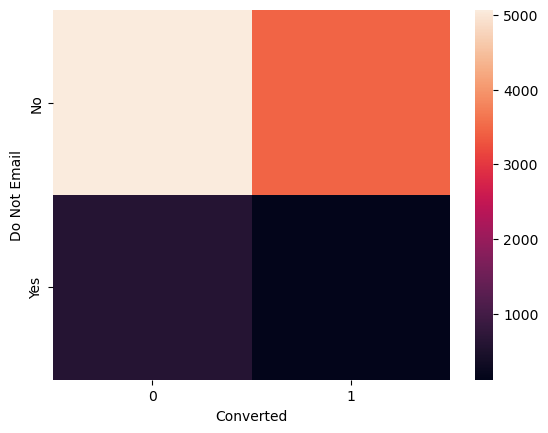

In [15]:
#Analyzing the relationship between two columns i.e. prector and response
sns.heatmap(pd.crosstab(df['Do Not Email'],df['Converted']))

In [16]:
#Checking unique values for analysis
df['Do Not Call'].value_counts()

# Observations : 
# 'Do Not Email feature has 2 unqiue categories.
# This feature has imbalanced data
# Hence we will drop this feature from our analysis

No     9238
Yes       2
Name: Do Not Call, dtype: int64

<AxesSubplot:ylabel='Do Not Call'>

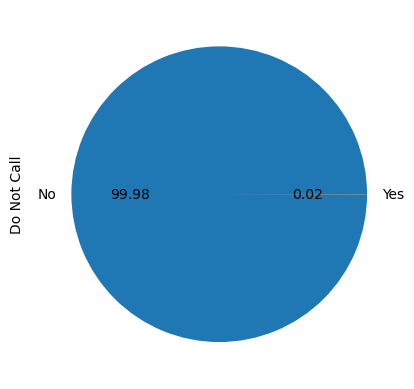

In [17]:
#checking the percentage of Do Not Call value percentage with pie chart

df['Do Not Call'].value_counts().plot(kind='pie',autopct='%.2f')

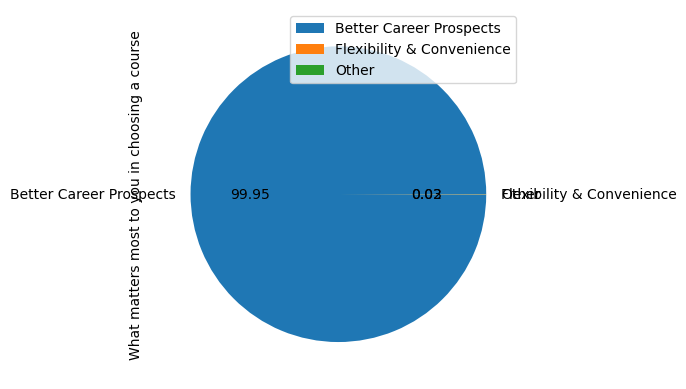

In [18]:
#checking the percentage distibustion of data with pie chart

df['What matters most to you in choosing a course'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()


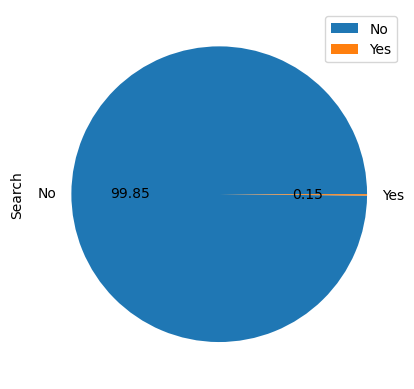

In [19]:
#checking the percentage distibustion of data with pie chart

df['Search'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()


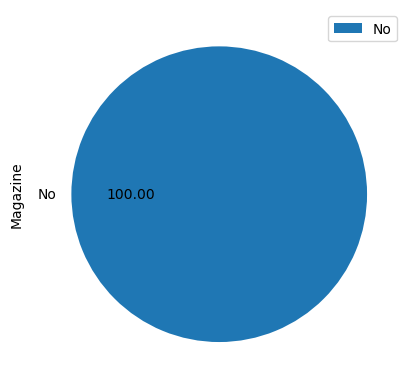

In [20]:
#checking the percentage distibustion of data with pie chart

df['Magazine'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()


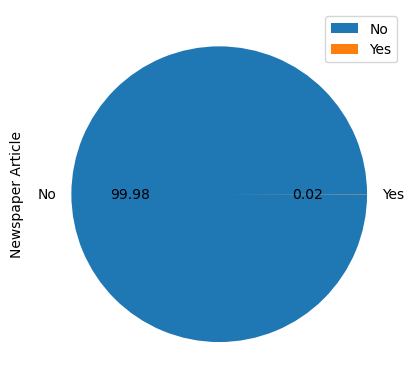

In [21]:
#checking the percentage distibustion of data with pie chart

df['Newspaper Article'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()


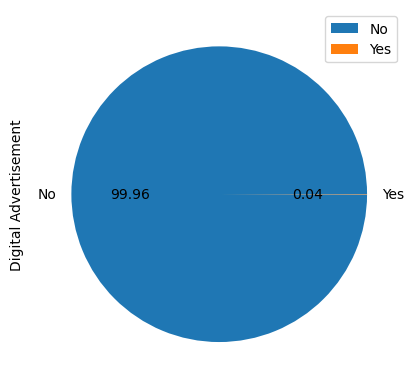

In [22]:
#checking the percentage distibustion of data with pie chart

df['Digital Advertisement'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

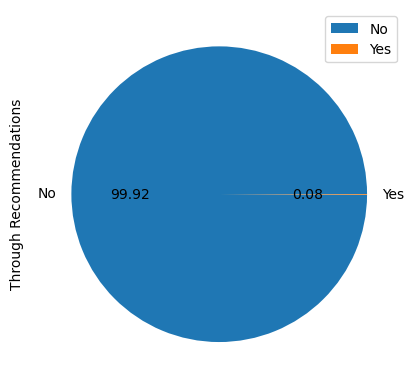

In [23]:
#checking the percentage distibustion of data with pie chart

df['Through Recommendations'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

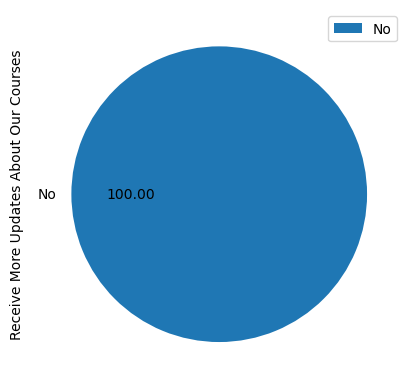

In [24]:
#checking the percentage distibustion of data with pie chart

df['Receive More Updates About Our Courses'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

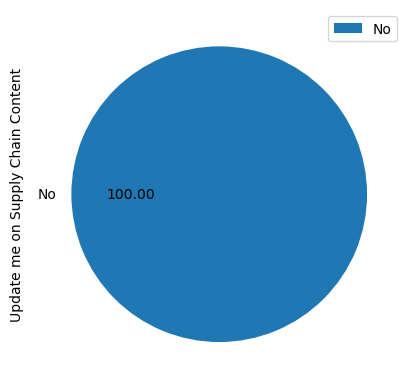

In [25]:
#checking the percentage distibustion of data with pie chart

df['Update me on Supply Chain Content'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

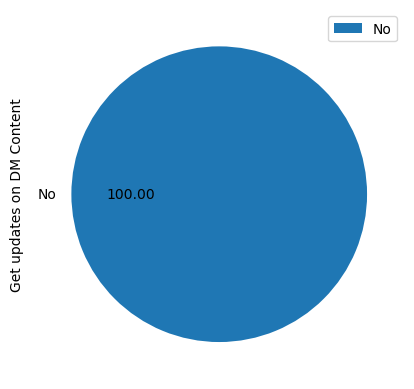

In [26]:
#checking the percentage distibustion of data with pie chart

df['Get updates on DM Content'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

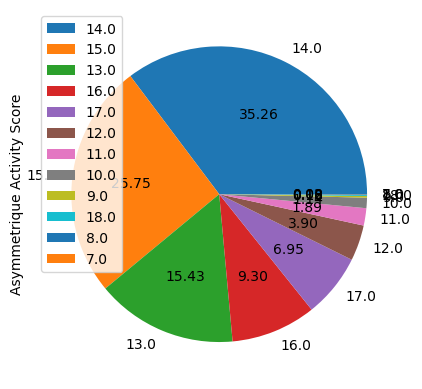

In [27]:
#checking the percentage distibustion of data with pie chart

df['Asymmetrique Activity Score'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

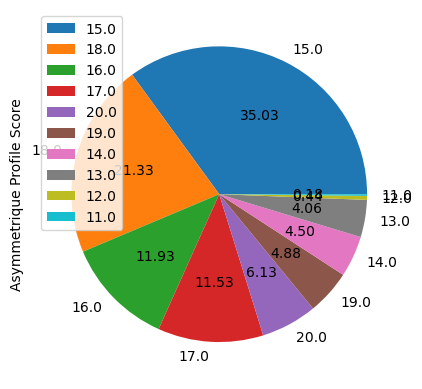

In [28]:
#checking the percentage distibustion of data with pie chart

df['Asymmetrique Profile Score'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()
plt.show()

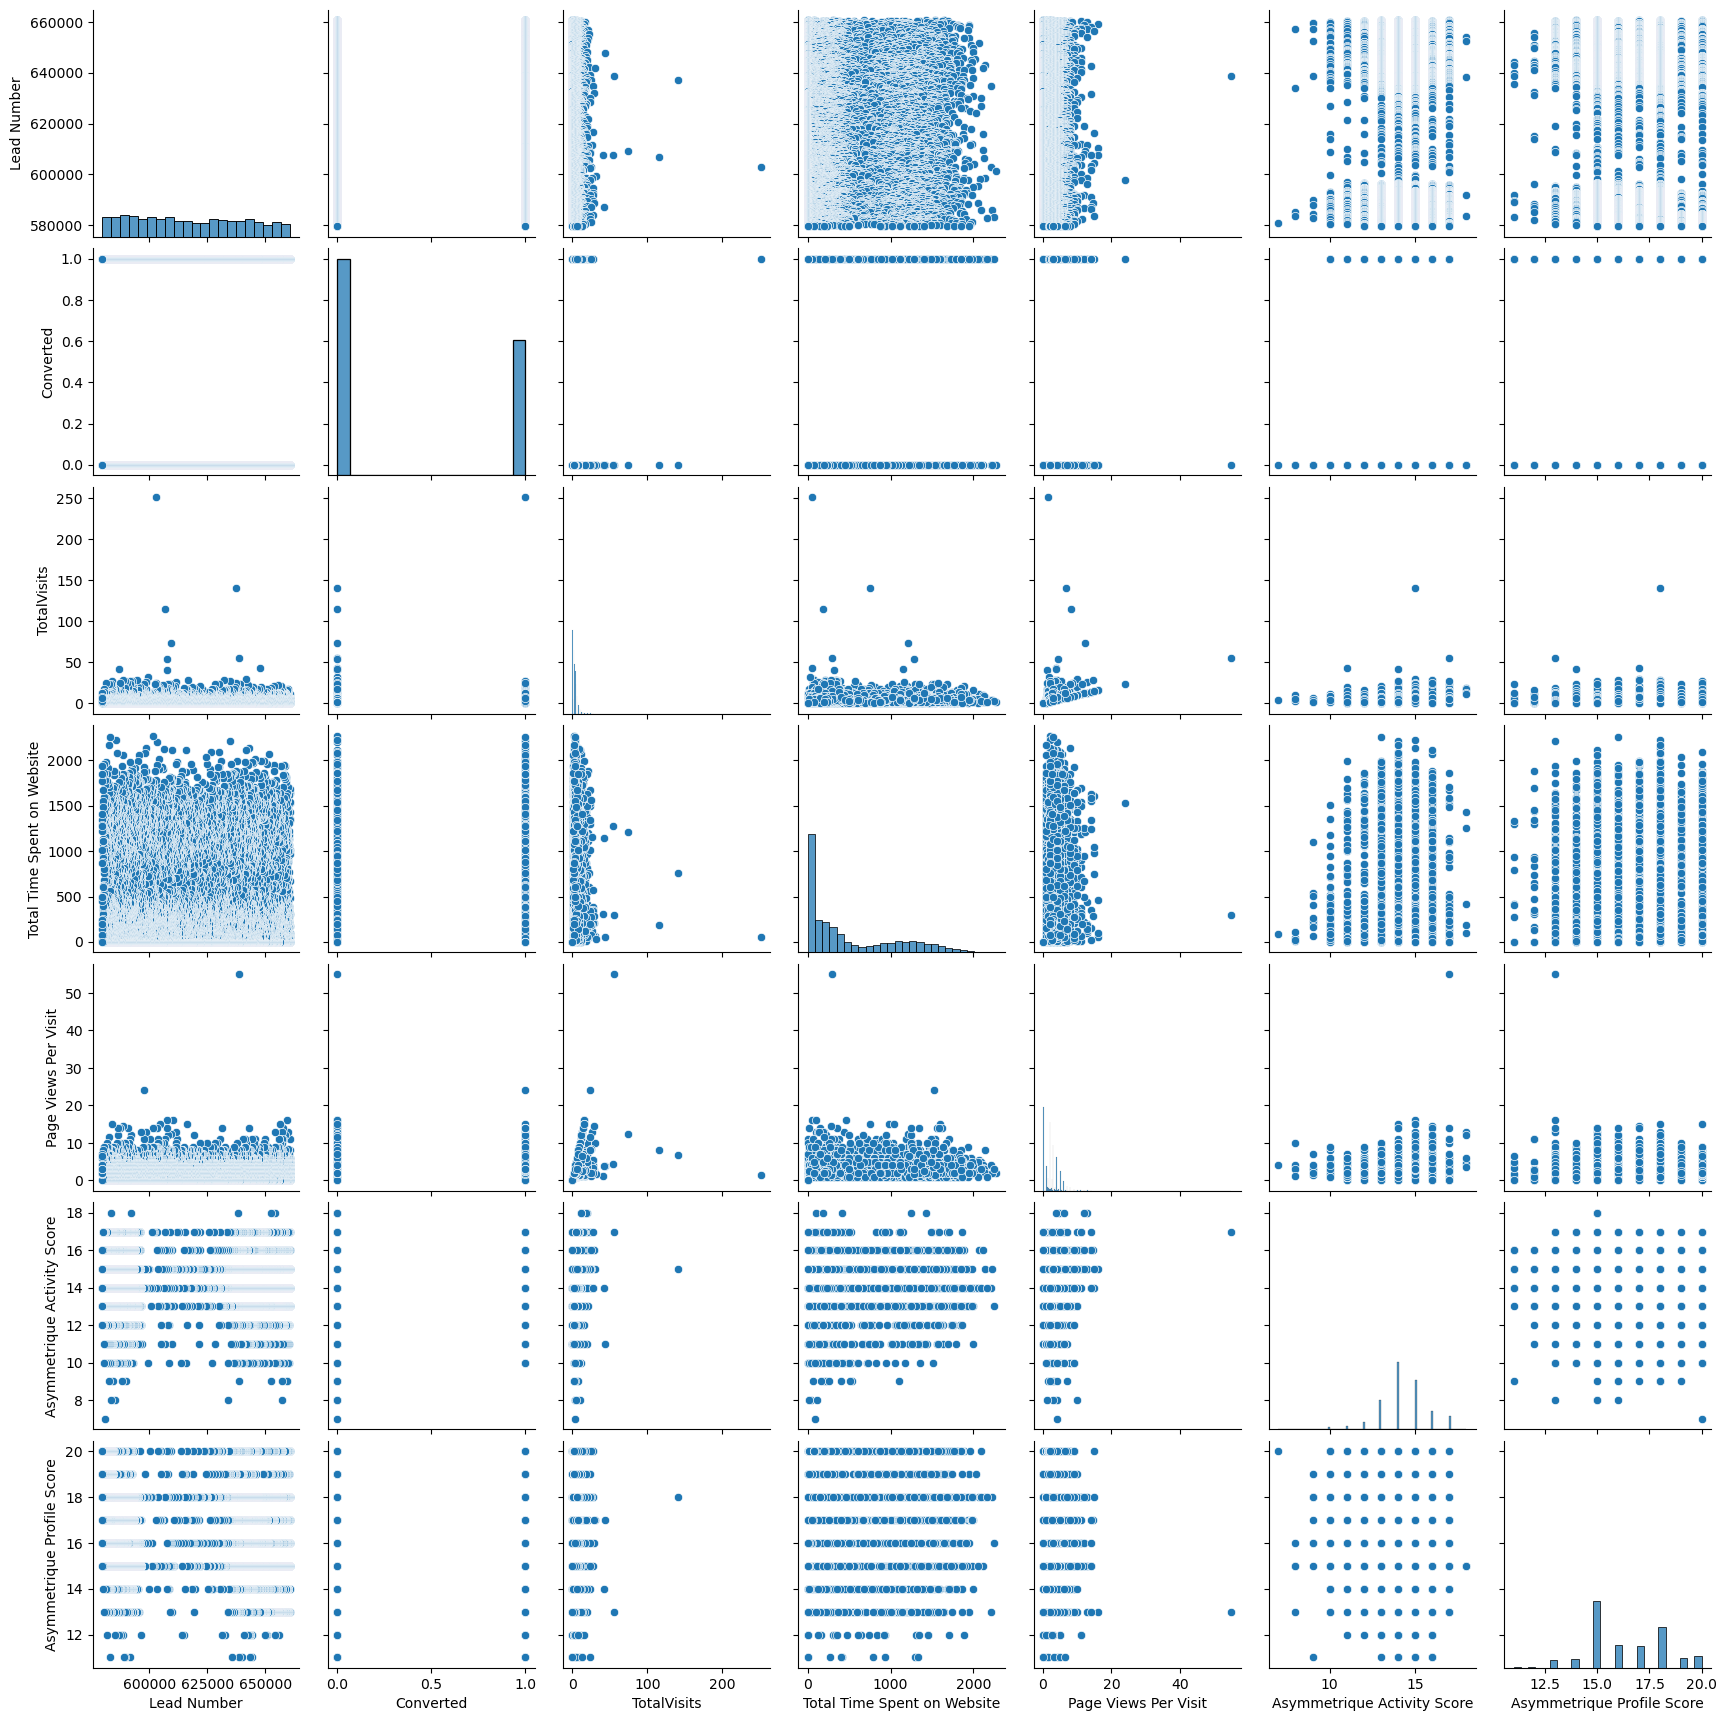

In [29]:
#plotting pairplot to check how data is distsributed with each variable
sns.pairplot(data=df)

### Observations : 
#### 1. There are so many features which have imbalanced data as we have seen in above pie charts.
####      Hence we will remove all the features which have imbalanced data
#### 2. Selecting only required columns for analysis and building model and creating new dataset

In [30]:
#Creating new dataset using predictor features for Converted feature
df_c=df.drop(['Prospect ID', 'Lead Number', 
       'Do Not Email', 'Do Not Call','Specialization',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 
       'I agree to pay the amount through cheque'],axis=1)

In [31]:
#Checking the dimensions of the columns and rows of newly created dataset with required features
df_c.shape

(9240, 18)

In [32]:
#Checking the dtypes
df_c.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
How did you hear about X Education         object
What is your current occupation            object
Tags                                       object
Lead Quality                               object
Lead Profile                               object
City                                       object
Asymmetrique Activity Score               float64
Asymmetrique Profile Score                float64
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

## *3. Missing Values*

In [33]:
#Checking count of the null values
df_c.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
Lead Quality                              4767
Lead Profile                              2709
City                                      1420
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [34]:
#Checking percentage of the null values
df_c.isnull().mean()*100 

Lead Origin                                0.000000
Lead Source                                0.389610
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
How did you hear about X Education        23.885281
What is your current occupation           29.112554
Tags                                      36.287879
Lead Quality                              51.590909
Lead Profile                              29.318182
City                                      15.367965
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### Observations : 
 1.We can see there are some features which contains missing values.                                                      
 2.we will analyze each feature to handle the missing values.

In [35]:
#Checking how much percentage data will remain in column after remving null values
len(df_c.dropna())/len(df_c) *100

21.02813852813853

### Observation :
1. If we remove all null records  only 21.02% data will remain to us 
hence we cannot remove all null records 
2. we must have to handle them

#### Lead Source : Column

In [36]:
#Checking the data of Lead Source feature
df_c['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [37]:
#Handling null values for Lead Source column

df_c['Lead Source'].isnull().mean()*100 


#Observation :
#Percentage of null values is less than 1% so we will remove null records 

0.38961038961038963

In [38]:
#Removing all null records of Lead Source column
df_c.dropna(subset=['Lead Source'], inplace=True)

In [39]:
#Verifying that null values are successfu;;y dropped or not
print(df_c.isnull().mean()*100)
print("dimensions : ",df_c.shape)

Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                1.412429
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.412429
Last Activity                              1.097349
Country                                   26.358105
How did you hear about X Education        23.978705
What is your current occupation           29.226423
Tags                                      36.310300
Lead Quality                              51.640591
Lead Profile                              29.432855
City                                      15.428075
Asymmetrique Activity Score               45.643199
Asymmetrique Profile Score                45.643199
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64
dimensions :  (9204, 18)


#### TotalVisits : Column

In [40]:
#Handling null values for TotalVisits column

df_c['TotalVisits'].isnull().mean()*100 


#Observation :
#Percentage of null values is less than 1% so we will remove null records 

1.4124293785310735

In [41]:
#Removing all null records of Lead Source column
df_c.dropna(subset=['TotalVisits'], inplace=True)

In [42]:
#Verifying that null values are successfu;;y dropped or not
print(df_c.isnull().mean()*100)
print("dimensions : ",df_c.shape)

Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Country                                   25.303064
How did you hear about X Education        24.245096
What is your current occupation           29.567996
Tags                                      36.665197
Lead Quality                              52.016751
Lead Profile                              29.777386
City                                      15.638087
Asymmetrique Activity Score               45.768129
Asymmetrique Profile Score                45.768129
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64
dimensions :  (9074, 18)


#### Country : Column

In [43]:
#Handling null values for Country column
#Checking the data

df_c['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

<AxesSubplot:ylabel='Country'>

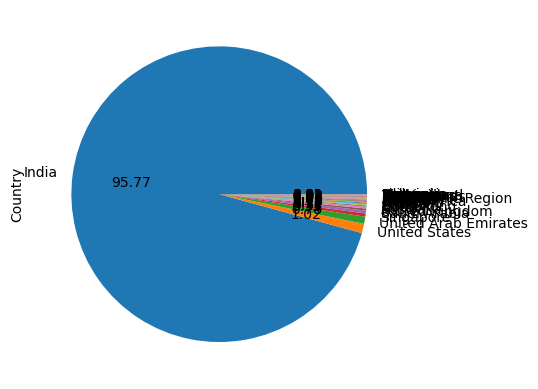

In [44]:
#checking the percentage distribustion with pie chart

df_c['Country'].value_counts().plot(kind='pie',autopct='%.2f')

#Observations :
# Country India has 95.77 percentage records 
# So we will replace all null values with India only

In [45]:
#Replacing all null values with India
df_c['Country'].replace(np.nan, 'India',inplace=True)

In [46]:
#Verifying that null values are successfu;;y updated or not
print(df_c.isnull().mean()*100)
print("dimensions : ",df_c.shape)


#Observations : 
#All null values of Country columns are replaced successfully

Lead Origin                                0.000000
Lead Source                                0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Country                                    0.000000
How did you hear about X Education        24.245096
What is your current occupation           29.567996
Tags                                      36.665197
Lead Quality                              52.016751
Lead Profile                              29.777386
City                                      15.638087
Asymmetrique Activity Score               45.768129
Asymmetrique Profile Score                45.768129
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64
dimensions :  (9074, 18)


#### How did you hear about X Education : Column

In [47]:
#Checking the dtype of column
df_c['How did you hear about X Education'].dtype

dtype('O')

In [48]:
#Handling null values for How did you hear about X Education column
#Checking the data

df_c['How did you hear about X Education'].value_counts()


#Observations : 
#As mentioned in the problem statement select means lead has not selected any value from that dropdown
#So first we will replace that with not a null value

Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [49]:
#Replacing all select values with not a null
df_c['How did you hear about X Education'].replace('Select',np.nan,inplace=True)

In [50]:
#Verifying the chnages by checking null values for this column

df_c['How did you hear about X Education'].isnull().mean()*100

#Obsservations : 
# We can see that 78.19% are null values un this column 
# So we will drop this column from our dataset

78.09124972448754

In [51]:
#Dropping column How did you hear about X Education
df_c.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [52]:
#Verifying column has dropped successfully or not
df_c.info()

#Observations : 
#Column has successfully dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Country                                 9074 non-null   object 
 8   What is your current occupation         6391 non-null   object 
 9   Tags                                    5747 non-null   object 
 10  Lead Quality                            4354 non-null   obje

#### What is your current occupation : Column

In [53]:
#Handling null values for What is your current occupation
#Checking the data

df_c['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [54]:
#Checking null value percentage
df_c['What is your current occupation'].isnull().mean()*100 

29.5679964734406

<AxesSubplot:ylabel='What is your current occupation'>

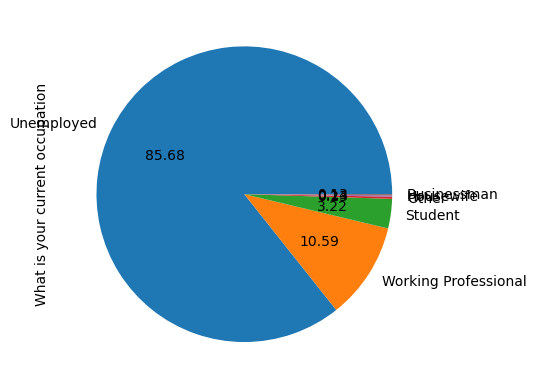

In [55]:
#checking the percentage distribustion with pie chart

df_c['What is your current occupation'].value_counts().plot(kind='pie',autopct='%.2f')

#Observations :
# Unemployed  has 85.68 percentage records 
# So we will replace all null values with India only

In [56]:
#Replacing null values with mode i.e. unemployed
df_c['What is your current occupation'].replace(np.nan,'Unemployed',inplace=True)

In [57]:
#Verifying null values column

df_c['What is your current occupation'].isnull().sum()

0

#### Tags : Column

In [58]:
#Checking the dtype of Tags column
df_c['Tags'].dtype

dtype('O')

In [59]:
#Checking the percentage of null values

df_c['Tags'].isnull().mean()*100


#Observations :
#Tags is a Categorical feature data which contains 36.66% of null values
#Hence we will create one more category i.e. No tag and will replace all null values with this tag

36.665197266916465

In [60]:
#Replacing null values with a new category i.e. No tag
df_c['Tags'].replace(np.nan,'No tag',inplace=True)

In [61]:
#Handling null values for How did you hear about X Education column
#Checking the data

df_c['Tags'].value_counts()

#Observations : 
#New category added successfully

No tag                                               3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

<AxesSubplot:ylabel='Tags'>

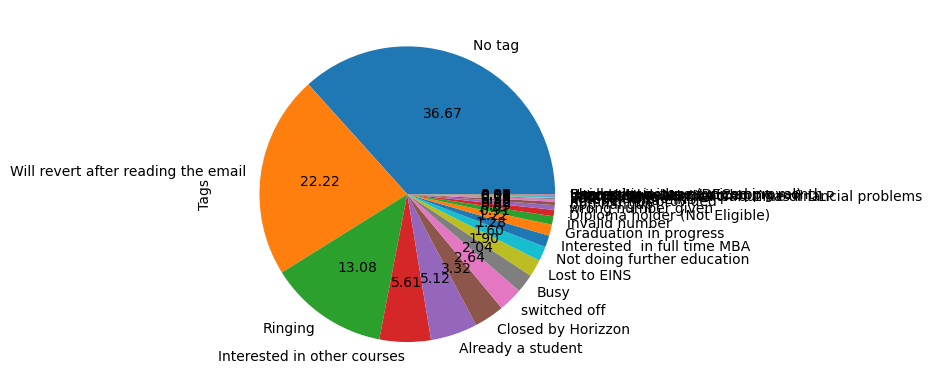

In [62]:
#checking the percentage distribustion with pie chart

df_c['Tags'].value_counts().plot(kind='pie',autopct='%.2f')


#### Lead Quality : Column

In [63]:
#Checking the percentage of null values

df_c['Lead Quality'].isnull().mean()*100


#Observations :
#Tags is a Categorical feature data which contains 52.01% of null values
#Hence we will create one more category i.e. No tag and will replace all null values with this tag

52.01675115715231

In [64]:
#Removing column because of 52.01% percentage of null values

df_c.drop(['Lead Quality'],axis=1,inplace=True)

In [65]:
#Verifying column has dropped successfully or not
df_c.info()

#Observations : 
#Column has successfully dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Country                                 9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  Lead Profile                            6372 non-null   obje

#### Lead Profile : Column

In [66]:
#Checking the percentage of null values

df_c['Lead Profile'].isnull().mean()*100



#Observations :
#Tags is a Categorical feature data which contains 52.01% of null values
#Hence we will create one more category i.e. No tag and will replace all null values with this tag

29.777385937844393

In [67]:
#Checking the data

df_c['Lead Profile'].value_counts()

#Observations : 
#As mentioned in the problem statement select means lead has not selected any value from that dropdown
#So first we will replace that with not a null value

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [68]:
#Replacing all select values with not a null
df_c['Lead Profile'].replace('Select',np.nan,inplace=True)

In [69]:
#Verifying the chnages by checking null values for this column

df_c['Lead Profile'].isnull().mean()*100

#Obsservations : 
# We can see that 74.46% are null values un this column 
# So we will drop this column from our dataset

74.46550584086401

In [70]:
#Removing column because of 74.46% percentage of null values

df_c.drop(['Lead Profile'],axis=1,inplace=True)

In [71]:
#Verifying column has dropped successfully or not
df_c.info()

#Observations : 
#Column has successfully dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Country                                 9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    7655 non-null   obje

#### City : Column

In [72]:
#Checking the percentage of null values

df_c['City'].isnull().mean()*100

15.638086841525237

In [73]:
#Checking the data

df_c['City'].value_counts(dropna=False)

#Observations : 
#As mentioned in the problem statement select means lead has not selected any value from that dropdown
#So first we will replace that with not a null value

Mumbai                         3177
Select                         2156
NaN                            1419
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [74]:
#Replacing all select values with not a null
df_c['City'].replace('Select',np.nan,inplace=True)

In [75]:
#Verifying the chnages by checking null values for this column

df_c['City'].isnull().mean()*100

#Obsservations : 
# We can see that 39.39 are null values un this column 
# So we will replace with mode category

39.39828080229226

In [76]:
#Replacing all null values with Unknown
df_c['City'].replace(np.nan, 'Unknown',inplace=True)

In [77]:
#Verifying the data

df_c['City'].value_counts(dropna=False)

Unknown                        3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

#### Asymmetrique Activity Score : Column

In [78]:
#Checking the percentage of null values

df_c['Asymmetrique Activity Score'].isnull().mean()*100

45.768128719418115

(array([   5.,    9.,   57.,   95.,  196.,  775., 1771., 1293.,  467.,
         354.]),
 array([ 7. ,  8.1,  9.2, 10.3, 11.4, 12.5, 13.6, 14.7, 15.8, 16.9, 18. ]),
 <BarContainer object of 10 artists>)

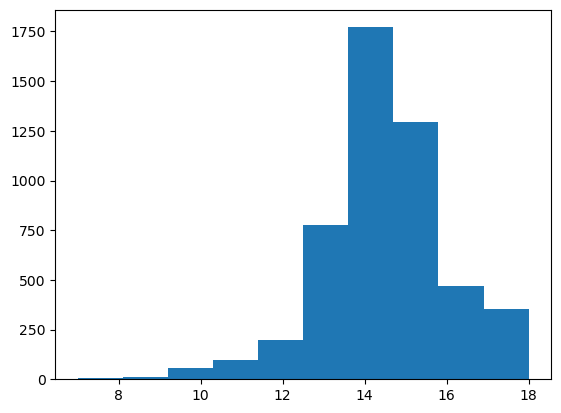

In [79]:
#As this feature has cintinous values so we will analyze the distibustion of data first

plt.hist(df['Asymmetrique Activity Score'])

#### Asymmetrique Profile Score : Column

In [80]:
#Checking the percentage of null values

df_c['Asymmetrique Profile Score'].isnull().mean()*100

45.768128719418115

(array([   9.,   22.,  204.,  226., 1759.,  599.,  579., 1071.,  245.,
         308.]),
 array([11. , 11.9, 12.8, 13.7, 14.6, 15.5, 16.4, 17.3, 18.2, 19.1, 20. ]),
 <BarContainer object of 10 artists>)

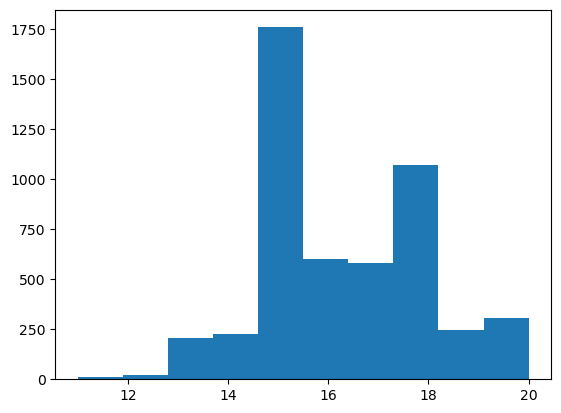

In [81]:
#As this feature has cintinous values so we will analyze the distibustion of data first

plt.hist(df['Asymmetrique Profile Score'])

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='Asymmetrique Profile Score'>

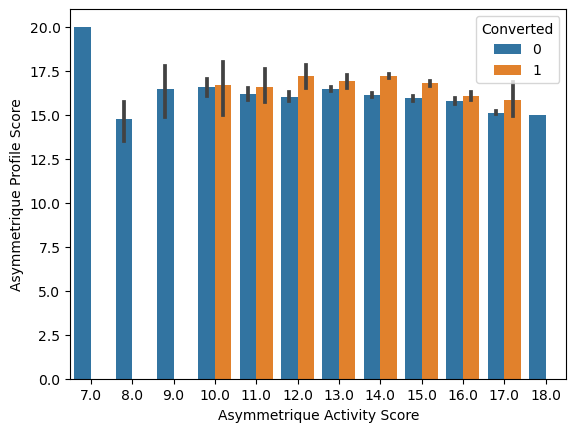

In [82]:
#Checking the relation with graphs 
sns.barplot(df['Asymmetrique Activity Score'],df['Asymmetrique Profile Score'],hue=df['Converted'])

In [83]:
#dropping both columns because more than 45% missing values
df_c.drop(['Asymmetrique Profile Score'],axis=1,inplace=True)
df_c.drop(['Asymmetrique Activity Score'],axis=1,inplace=True)

In [84]:
#Finally verifying data
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Country                                 9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

## *4. Renaming Column Names*

In [85]:
df_c.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
#As some column names are not appropriate, so renaming column names
df_c.columns=['Lead_Origin', 'Lead_Source', 'Converted', 'Total_Visits',
       'Time_Website', 'Page_Views', 'Last_Activity',
       'Country', 'current_occupation', 'Tags', 'City',
       'free_copy', 'Notable_Activity']

In [87]:
df_c.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'Total_Visits',
       'Time_Website', 'Page_Views', 'Last_Activity', 'Country',
       'current_occupation', 'Tags', 'City', 'free_copy', 'Notable_Activity'],
      dtype='object')

# *EDA*
### 1.Outlier detection and handling
### 2.Bivarient Analysis
### 3.Multivarient analysis

In [88]:
#Checking the baisc information again
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lead_Origin         9074 non-null   object 
 1   Lead_Source         9074 non-null   object 
 2   Converted           9074 non-null   int64  
 3   Total_Visits        9074 non-null   float64
 4   Time_Website        9074 non-null   int64  
 5   Page_Views          9074 non-null   float64
 6   Last_Activity       9074 non-null   object 
 7   Country             9074 non-null   object 
 8   current_occupation  9074 non-null   object 
 9   Tags                9074 non-null   object 
 10  City                9074 non-null   object 
 11  free_copy           9074 non-null   object 
 12  Notable_Activity    9074 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 992.5+ KB


<AxesSubplot:xlabel='Total_Visits'>

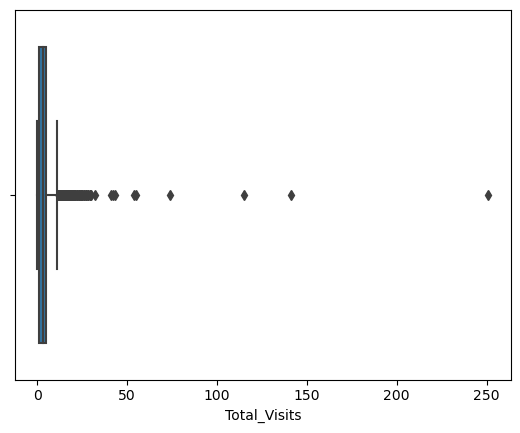

In [89]:
#Checking outliers for the feature Total_Visits 

sns.boxplot(df_c['Total_Visits'])

#Observations :
#We can see many outliers are present
#We will use capping technique 

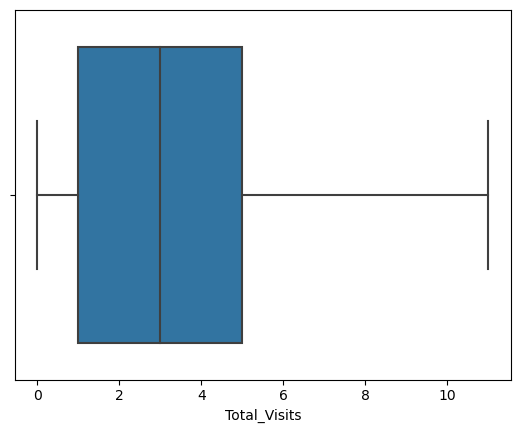

In [90]:
#Handled outliers by capping technquie
Q3 = df_c.Total_Visits.quantile(0.75)
Q1 = df_c.Total_Visits.quantile(0.25)
IQR=Q3-Q1
max=Q3+1.5*IQR
min=Q1-1.5*IQR
        
df_c['Total_Visits'] = np.where(df_c['Total_Visits'] >= max,
        max,
        np.where(df_c['Total_Visits'] <= min,
        min,
        df_c['Total_Visits']))

sns.boxplot(df_c['Total_Visits'])
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Total_Visits'>

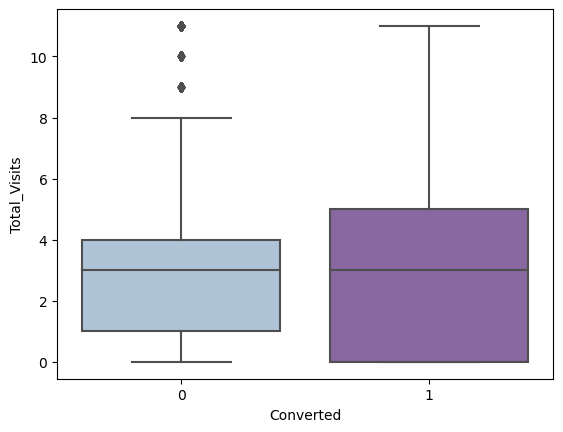

In [91]:
#Analyzing relation between Total_Visits and converted
sns.boxplot(df_c['Converted'],df_c['Total_Visits'],palette = "BuPu")

<AxesSubplot:xlabel='Time_Website'>

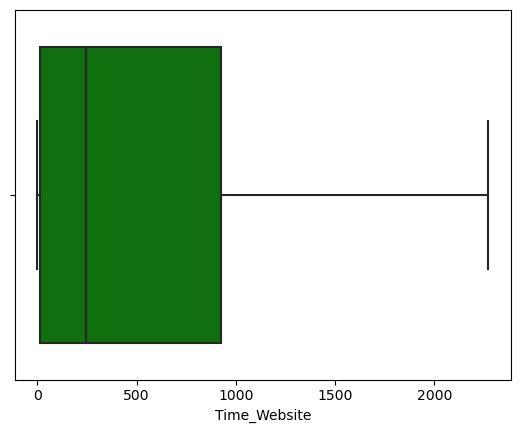

In [92]:
#Checking outliers for the feature Total_Visits 

sns.boxplot(df_c['Time_Website'],color='g')

#Observations :
#We can see no outliers are present

<AxesSubplot:xlabel='Converted', ylabel='Time_Website'>

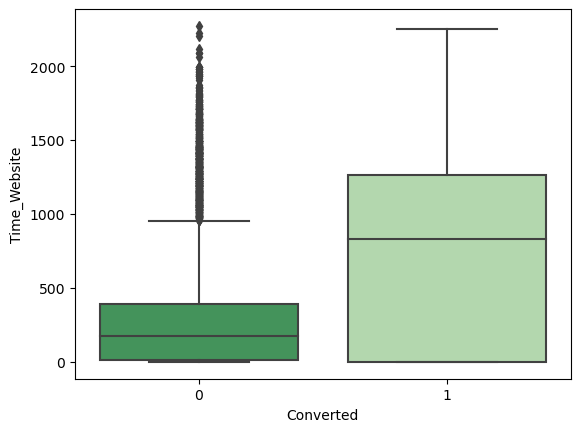

In [93]:
#Analyzing relation between Time_Website and converted
sns.boxplot(df_c['Converted'],df_c['Time_Website'],palette = "Greens_r")

<AxesSubplot:xlabel='Page_Views'>

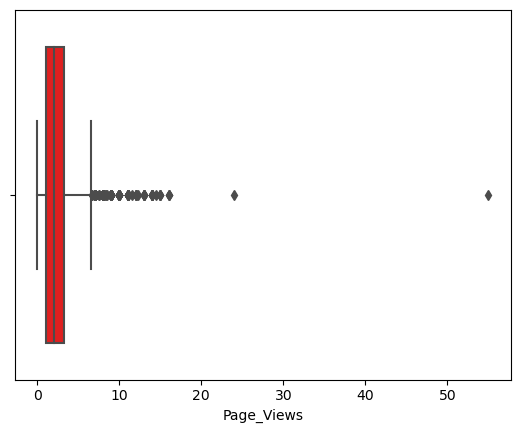

In [94]:
#Checking outliers for the feature Total_Visits 

sns.boxplot(df_c['Page_Views'],color='r')

#Observations :
#We can see many outliers are present
#We will use capping technique 

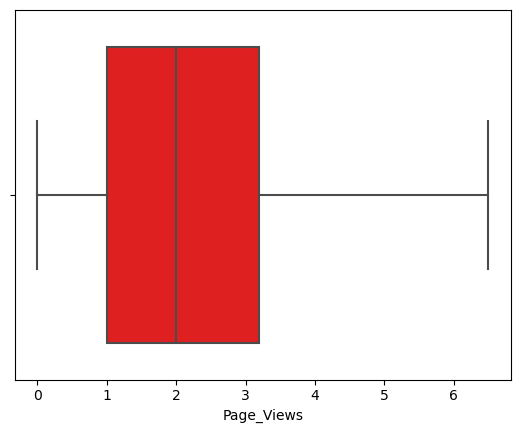

In [95]:
#Handled outliers by capping technquie
Q3 = df_c.Page_Views.quantile(0.75)
Q1 = df_c.Page_Views.quantile(0.25)
IQR=Q3-Q1
max=Q3+1.5*IQR
min=Q1-1.5*IQR
        
df_c['Page_Views'] = np.where(df_c['Page_Views'] >= max,
        max,
        np.where(df_c['Page_Views'] <= min,
        min,
        df_c['Page_Views']))

sns.boxplot(df_c['Page_Views'],color='r')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Page_Views'>

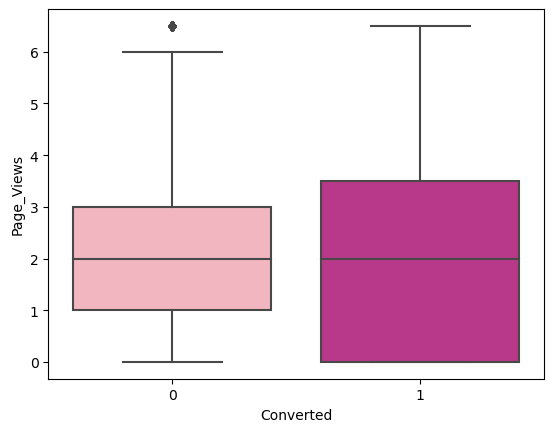

In [96]:
#Analyzing relation between Time_Website and converted
sns.boxplot(df_c['Converted'],df_c['Page_Views'],palette = "RdPu")

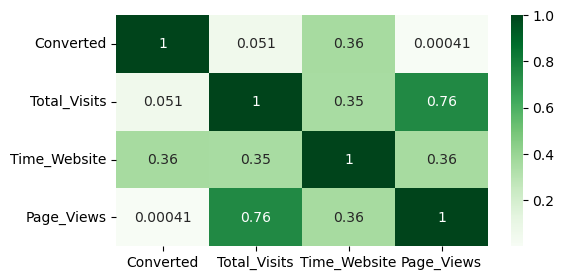

In [97]:
#Checking correlations of numeric values  using heatmap
plt.figure(figsize=(6,3))
sns.heatmap(df_c.corr(), cmap="Greens", annot=True)
plt.show()

#Observations : 
#Total_Visits and Page_Vies have strong correlation

In [98]:
#replacing values which are less to one category i.e.others
df_c['Lead_Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead_Source, dtype: int64

In [99]:
#Grouping the categories which have very less count into a new category named 'Others'
df_c['Lead_Source'] = df_c['Lead_Source'].replace(['Facebook', 'bing', 'Click2call', 'Press_Release',
  'Social Media','Live Chat','Pay per Click Ads', 'WeLearn','blog', 'testone', 'welearnblog_Home', 'youtubechannel','NC_EDM'], 'Others')

In [100]:
#Merging two similar categories
df_c['Lead_Source'] = df_c['Lead_Source'].replace(['google'], 'Google')

In [101]:
#Verifying columns updated 
df_c['Lead_Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead_Source, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Lead_Source'>

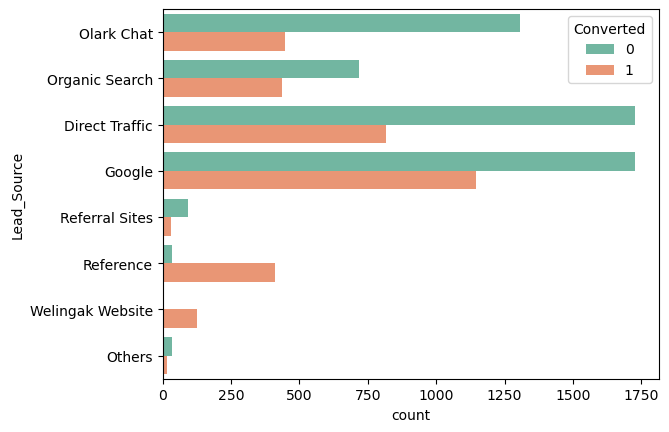

In [102]:
#Analyzing through graph
sns.countplot( y = 'Lead_Source', hue = 'Converted',data = df_c,palette = "Set2")


#Observations :
#Sources from google converted to yes are more

In [103]:
#replacing values which are less to one category i.e.others
df_c['Last_Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [104]:
#Grouping the categories which have very less count into a new category named 'Others'
df_c['Last_Activity'] = df_c['Last_Activity'].replace(['View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam',
  'Visited Booth in Tradeshow','Resubscribed to emails'], 'Others')

In [105]:
#Verifying columns updated 
df_c['Last_Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Had a Phone Conversation       25
Others                         17
Name: Last_Activity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Last_Activity'>

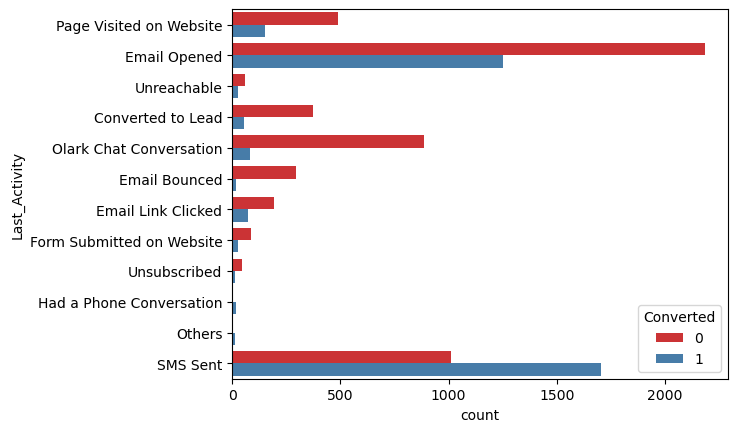

In [106]:
#Analyzing through graph
sns.countplot(y = 'Last_Activity', hue = 'Converted',data = df_c,palette = "Set1")

In [107]:
#replacing values which are less to one category i.e.others
df_c['Notable_Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Notable_Activity, dtype: int64

In [108]:
#Grouping the categories which have very less count into a new category named 'Others'
df_c['Notable_Activity'] = df_c['Notable_Activity'].replace(['Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked',
  'Form Submitted on Website','Email Received'], 'Others')

In [109]:
#Verifying columns updated 
df_c['Notable_Activity'].value_counts()

Modified                    3267
Email Opened                2823
SMS Sent                    2152
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  45
Unreachable                   32
Had a Phone Conversation      14
Others                         7
Name: Notable_Activity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Notable_Activity'>

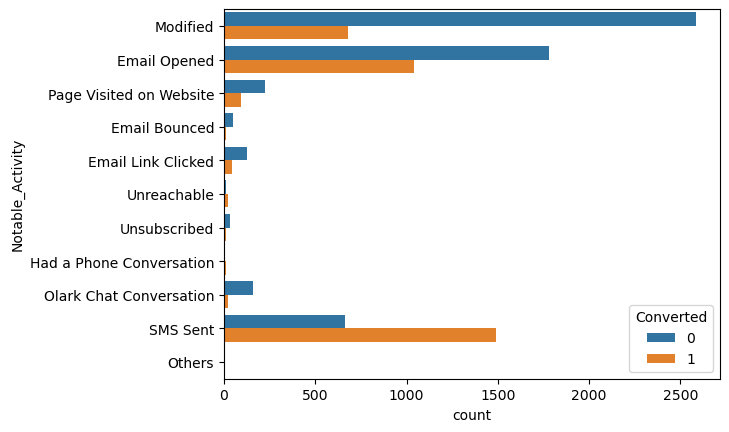

In [110]:
#Analyzing through graph

sns.countplot(y = 'Notable_Activity', hue ='Converted',data = df_c)

In [111]:
#Analyzing relation between free_copy and converted
df_c['free_copy'].value_counts()

No     6186
Yes    2888
Name: free_copy, dtype: int64

<AxesSubplot:xlabel='free_copy', ylabel='count'>

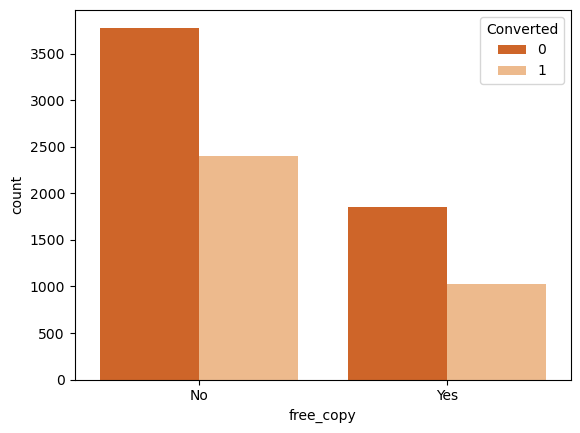

In [112]:
sns.countplot(x = 'free_copy', hue ='Converted',data = df_c,palette='Oranges_r')

In [113]:
#Analyzing relation between City and converted
df_c['City'].value_counts()

Unknown                        3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

<AxesSubplot:xlabel='count', ylabel='City'>

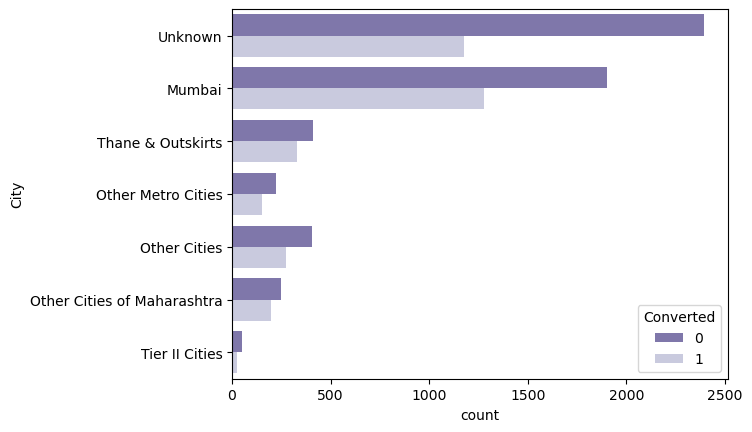

In [114]:
sns.countplot(y = 'City', hue = 'Converted',data = df_c,palette = "Purples_r")

In [115]:
#Analyzing relation between City and converted
df_c['Tags'].value_counts()

No tag                                               3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

<AxesSubplot:xlabel='count', ylabel='Tags'>

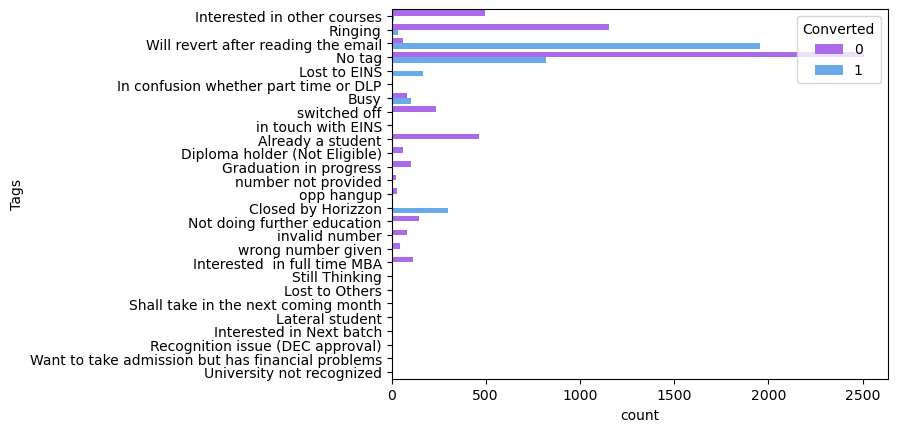

In [116]:
sns.countplot(y = 'Tags', hue = 'Converted',data = df_c,palette = "cool_r")

In [117]:
#Analyzing relation between City and converted
df_c['current_occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: current_occupation, dtype: int64

<AxesSubplot:xlabel='count', ylabel='current_occupation'>

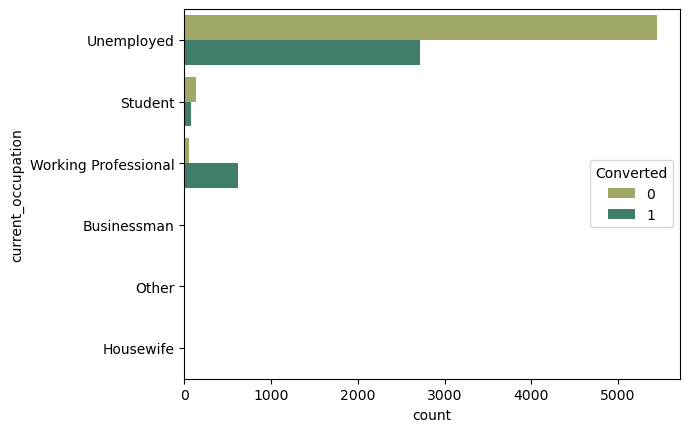

In [118]:
sns.countplot(y = 'current_occupation', hue = 'Converted',data = df_c,palette = "gist_earth_r")

In [119]:
#Checking the categories of Contry columns
df_c['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [120]:
#Grouping the categories which have very less count into a new category named 'Others'
df_c['Country'] = df_c['Country'].replace(['Indonesia','Sri Lanka','Kenya','Malaysia','Liberia','Tanzania','Denmark','Vietnam','Switzerland','Russia','Philippines','Ghana','Netherlands','Belgium','Italy','Bangladesh','Uganda','Asia/Pacific Region','China','Sweden','Canada','Kuwait','Germany','Nigeria','South Africa','France','Oman','Bahrain','Hong Kong'], 'Others')

<AxesSubplot:xlabel='count', ylabel='Country'>

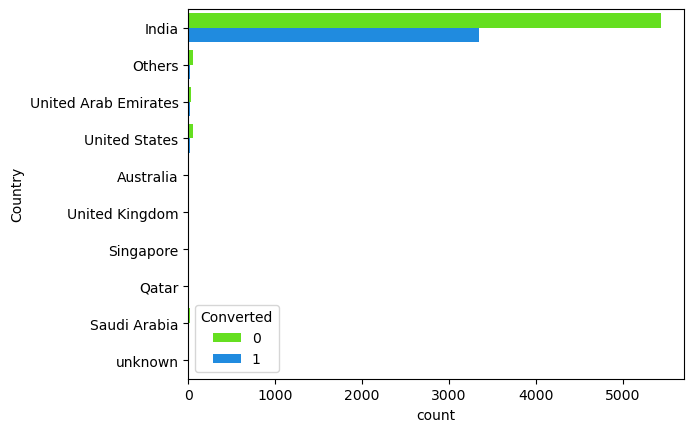

In [121]:
#Analyzing relation between Country and converted
sns.countplot(y = 'Country', hue = 'Converted',data = df_c,palette = "gist_rainbow")

<AxesSubplot:xlabel='count', ylabel='Last_Activity'>

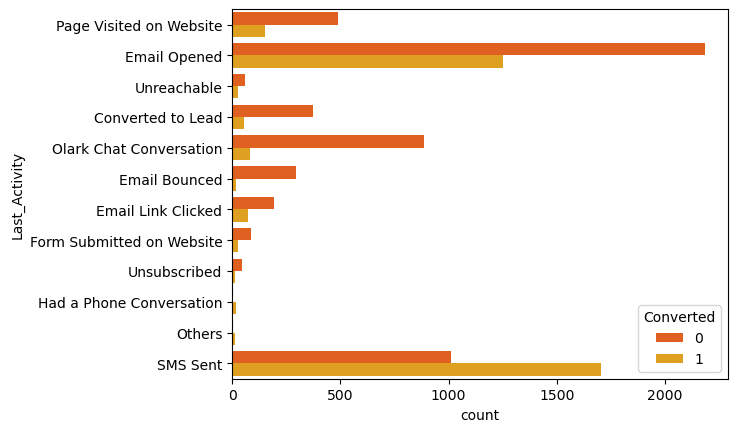

In [122]:
#Analyzing relation between Last Activity and converted
sns.countplot(y = 'Last_Activity', hue = 'Converted',data = df_c,palette = "autumn")

<AxesSubplot:xlabel='count', ylabel='Lead_Origin'>

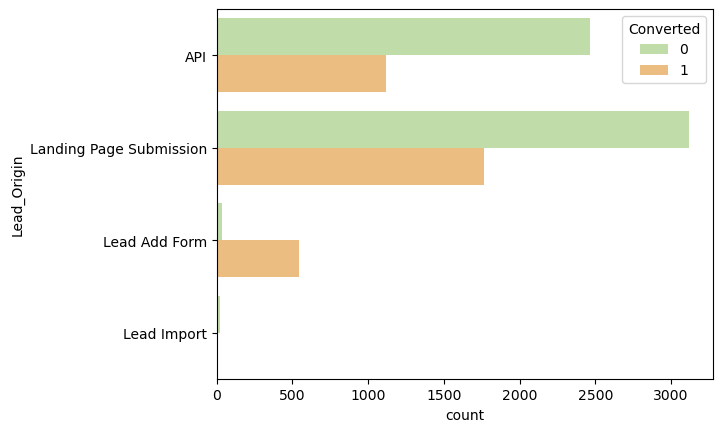

In [123]:
#Analyzing relation between Lead_Origin and converted
sns.countplot(y = 'Lead_Origin', hue = 'Converted',data = df_c,palette = "Spectral_r")

<AxesSubplot:xlabel='Converted', ylabel='Lead_Origin'>

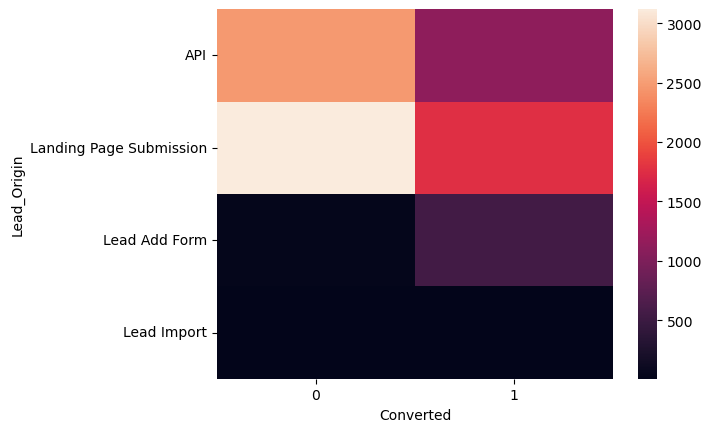

In [124]:
#Analyzing relationship between Converted and Lead_Origin
sns.heatmap(pd.crosstab(df_c['Lead_Origin'],df_c['Converted']))

In [125]:
#Percentage of converted for Lead_Origin feature category wise
df_c.groupby("Lead_Origin").mean()['Converted']

Lead_Origin
API                        0.311627
Landing Page Submission    0.361720
Lead Add Form              0.936317
Lead Import                0.300000
Name: Converted, dtype: float64

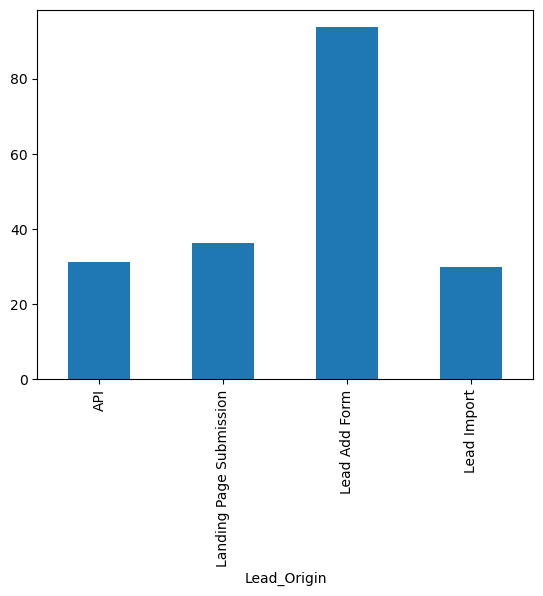

In [126]:
#How many leads converted in percentage : 
(df_c.groupby("Lead_Origin").mean()['Converted']*100).plot(kind='bar')
x_label='Lead_Origin'
y_label='percentage of converted leads'

In [127]:
#Percentage of converted for Lead_Source feature category wise
df_c.groupby("Lead_Source").mean()['Converted']

Lead_Source
Direct Traffic      0.321667
Google              0.399234
Olark Chat          0.255562
Organic Search      0.377816
Others              0.333333
Reference           0.925508
Referral Sites      0.248000
Welingak Website    0.984496
Name: Converted, dtype: float64

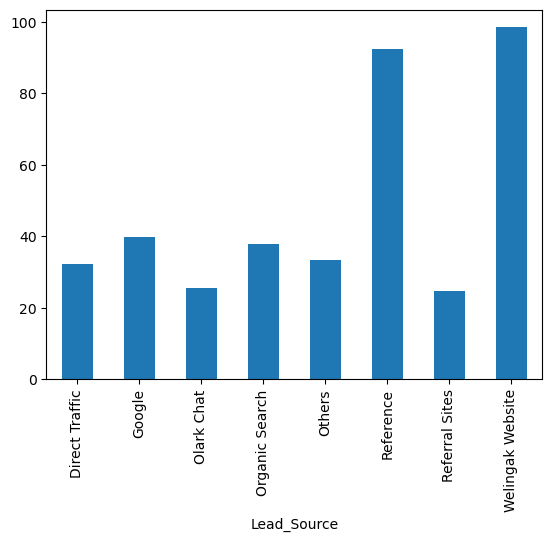

In [128]:
#How many leads converted  for Lead_Source  in percentage : 
(df_c.groupby("Lead_Source").mean()['Converted']*100).plot(kind='bar')
x_label='Lead_Source'
y_label='percentage of converted leads'

In [129]:
#Percentage of converted for Last_Activity  feature category wise
df_c.groupby("Last_Activity").mean()['Converted']

Last_Activity
Converted to Lead            0.126168
Email Bounced                0.051282
Email Link Clicked           0.273408
Email Opened                 0.364219
Form Submitted on Website    0.241379
Had a Phone Conversation     0.800000
Olark Chat Conversation      0.086420
Others                       0.647059
Page Visited on Website      0.235937
SMS Sent                     0.627761
Unreachable                  0.322222
Unsubscribed                 0.237288
Name: Converted, dtype: float64

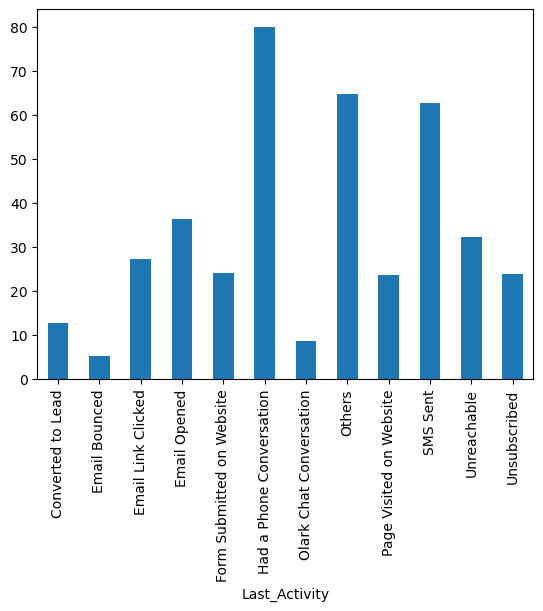

In [130]:
#How many leads converted  for Last_Activity  in percentage : 
(df_c.groupby("Last_Activity").mean()['Converted']*100).plot(kind='bar')
x_label='Last_Activity'
y_label='percentage of converted leads'

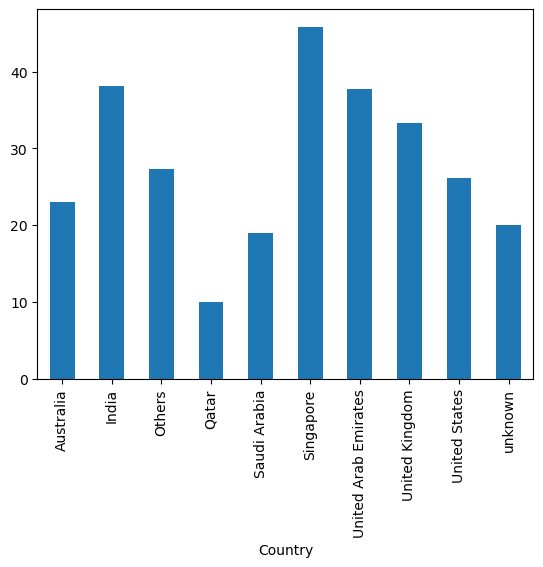

In [131]:
#How many leads converted  for Country in percentage : 
(df_c.groupby("Country").mean()['Converted']*100).plot(kind='bar')
x_label='Country'
y_label='percentage of converted leads'

In [132]:
#Percentage of converted for Country feature category wise
df_c.groupby("Country").mean()['Converted']

Country
Australia               0.230769
India                   0.381359
Others                  0.272727
Qatar                   0.100000
Saudi Arabia            0.190476
Singapore               0.458333
United Arab Emirates    0.377358
United Kingdom          0.333333
United States           0.260870
unknown                 0.200000
Name: Converted, dtype: float64

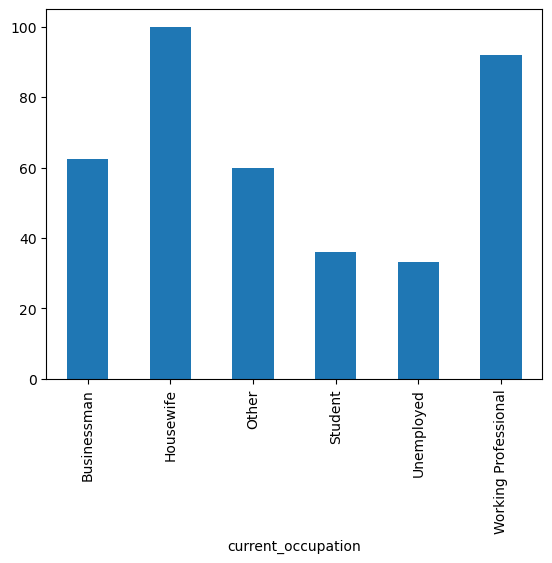

In [133]:
#How many leads converted  for current_occupation in percentage : 
(df_c.groupby("current_occupation").mean()['Converted']*100).plot(kind='bar')
x_label='current_occupation'
y_label='percentage of converted leads'

In [134]:
#Percentage of converted for current_occupation feature category wise
df_c.groupby("current_occupation").mean()['Converted']

current_occupation
Businessman             0.625000
Housewife               1.000000
Other                   0.600000
Student                 0.359223
Unemployed              0.332884
Working Professional    0.918759
Name: Converted, dtype: float64

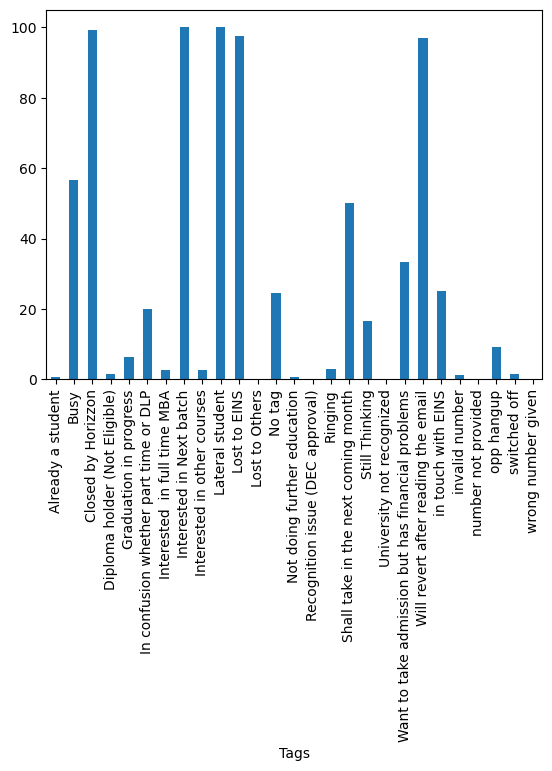

In [135]:
#How many leads converted  for Tags in percentage : 
(df_c.groupby("Tags").mean()['Converted']*100).plot(kind='bar')
x_label='Tags'
y_label='percentage of converted leads'

In [136]:
#Percentage of converted for Tags feature category wise
df_c.groupby("Tags").mean()['Converted']

Tags
Already a student                                    0.006452
Busy                                                 0.567568
Closed by Horizzon                                   0.993355
Diploma holder (Not Eligible)                        0.015873
Graduation in progress                               0.063063
In confusion whether part time or DLP                0.200000
Interested  in full time MBA                         0.025862
Interested in Next batch                             1.000000
Interested in other courses                          0.025540
Lateral student                                      1.000000
Lost to EINS                                         0.976744
Lost to Others                                       0.000000
No tag                                               0.246468
Not doing further education                          0.006897
Recognition issue (DEC approval)                     0.000000
Ringing                                              0.028644
Sha

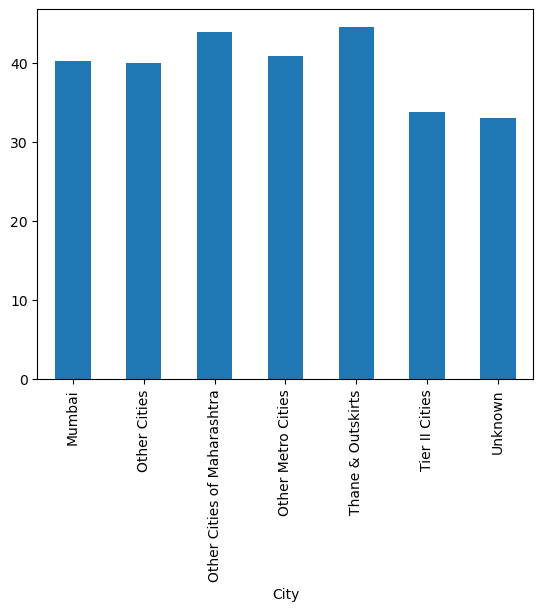

In [137]:
#How many leads converted  for City in percentage : 
(df_c.groupby("City").mean()['Converted']*100).plot(kind='bar')
x_label='City'
y_label='percentage of converted leads'

In [138]:
#Percentage of converted for free_copy feature category wise
df_c.groupby("free_copy").mean()['Converted']

free_copy
No     0.388781
Yes    0.356648
Name: Converted, dtype: float64

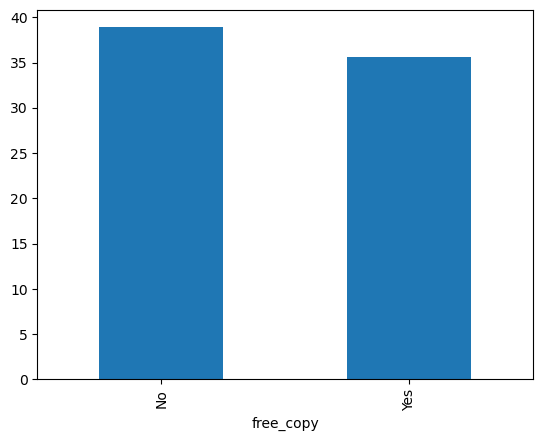

In [139]:
#How many leads converted  for free_copy in percentage : 
(df_c.groupby("free_copy").mean()['Converted']*100).plot(kind='bar')
x_label='free_copy'
y_label='percentage of converted leads'

In [140]:
#Percentage of converted for Notable_Activity feature category wise
df_c.groupby("Notable_Activity").mean()['Converted']

Notable_Activity
Email Bounced               0.150000
Email Link Clicked          0.260116
Email Opened                0.369111
Had a Phone Conversation    0.928571
Modified                    0.208142
Olark Chat Conversation     0.136612
Others                      0.714286
Page Visited on Website     0.292453
SMS Sent                    0.691914
Unreachable                 0.687500
Unsubscribed                0.266667
Name: Converted, dtype: float64

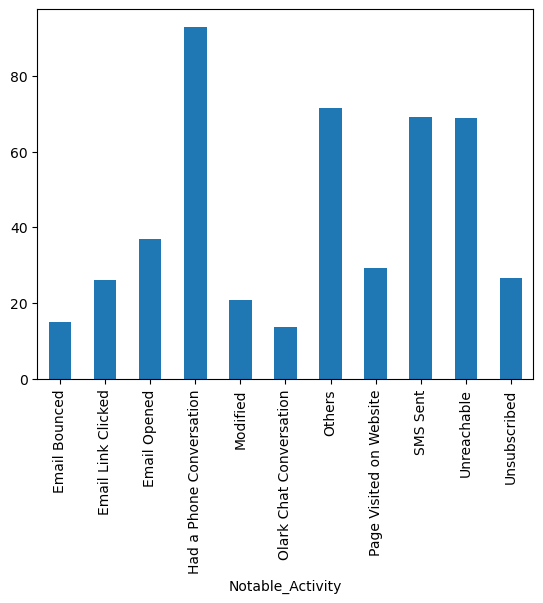

In [141]:
#How many leads converted  for Notable_Activity in percentage : 
(df_c.groupby("Notable_Activity").mean()['Converted']*100).plot(kind='bar')
x_label='Notable_Activity'
y_label='percentage of converted leads'

### Observations:

#### 1. API , Landing Page , Lead Import  has less conversion percentage less than 40% but counts of the leads from them are considerable

#### The count of leads from the Lead Add Form is pretty low but the conversion rate is very high • Lead Import has very less count as well as conversion rate and hence can be ignored

#### To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from "Lead Add Form'

#### 2. The count of last activity and notable activity as "Email Opened" is max  and conversion percentage of SMS sent as last activity is maximumso we should focus on that more

#### 3. We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

#### 4. Looking at above plot, we can say that working professionals have high conversion percentage, Number of Unemployed leads are more than any other category

#### To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as Linkedin etc. and also on increasing the conversion rate of Unemployed leads

#### 5. Tags - 'Will revert after reading the email and', 'Lateral student' and 'Closed by Horizzon' have high conversion rate

#### 6. We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

#### 6. The count of leads from the Google and Direct Traffic is maximum.The conversion rate of the leads from Reference and Welingak Website is maximum.To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat, 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website!

# *Logistic Regression Model*

In [142]:
#Withiut doing any statergy company can convert is :
print("Coversion rate = ",(sum(df_c["Converted"])/len(df_c["Converted"].index))*100)

Coversion rate =  37.85541106458012


### *Dummy Variable Creation*

In [143]:
#Dimensions of the Fnal dataset
df_c.shape

(9074, 13)

In [144]:
#General information regarding column nmaes,data types and null values
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lead_Origin         9074 non-null   object 
 1   Lead_Source         9074 non-null   object 
 2   Converted           9074 non-null   int64  
 3   Total_Visits        9074 non-null   float64
 4   Time_Website        9074 non-null   int64  
 5   Page_Views          9074 non-null   float64
 6   Last_Activity       9074 non-null   object 
 7   Country             9074 non-null   object 
 8   current_occupation  9074 non-null   object 
 9   Tags                9074 non-null   object 
 10  City                9074 non-null   object 
 11  free_copy           9074 non-null   object 
 12  Notable_Activity    9074 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 992.5+ KB


In [145]:
#Verifying first 5 records
df_c.head()

Lead_Origin     Lead_Source  Converted  Total_Visits  \
0                      API      Olark Chat          0           0.0   
1                      API  Organic Search          0           5.0   
2  Landing Page Submission  Direct Traffic          1           2.0   
3  Landing Page Submission  Direct Traffic          0           1.0   
4  Landing Page Submission          Google          1           2.0   

   Time_Website  Page_Views            Last_Activity Country  \
0             0         0.0  Page Visited on Website   India   
1           674         2.5             Email Opened   India   
2          1532         2.0             Email Opened   India   
3           305         1.0              Unreachable   India   
4          1428         1.0        Converted to Lead   India   

  current_occupation                                 Tags     City free_copy  \
0         Unemployed          Interested in other courses  Unknown        No   
1         Unemployed                              Ringing  Unknown        No   
2            Student  Will revert after reading the email   Mumbai       Yes   
3         Unemployed                              Ringing   Mumbai        No   
4         Unemployed  Will revert after reading the email   Mumbai        No   

  Notable_Activity  
0         Modified  
1     Email Opened  
2     Email Opened  
3         Modified  
4         Modified

In [147]:
#Creating dummy variables for the features of categorical data
dummy=pd.get_dummies(df_c[['Lead_Origin','Lead_Source','Last_Activity','Country','current_occupation','Tags','City','Notable_Activity','free_copy']],drop_first=True)

In [148]:
#Verifying the column names of dummy columns which we have created 
dummy.columns

Index(['Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Form Submitted on Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent',
       'Last_Activity_Unreachable', 'Last_Activity_Unsubscribed',
       'Country_India', 'Country_Others', 'Country_Qatar',
       'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Country_unknown',
       'current_occupation_Housewife', 'c

In [149]:
#Verifying the column names of our dataset
df_c.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'Total_Visits',
       'Time_Website', 'Page_Views', 'Last_Activity', 'Country',
       'current_occupation', 'Tags', 'City', 'free_copy', 'Notable_Activity'],
      dtype='object')

In [150]:
# Concating these two datasets i.e. dummy datatset and original
df_c = pd.concat([df_c, dummy], axis=1)

In [151]:
#After concatinating verifying the deminsions of the updated dataset
df_c.shape

(9074, 91)

In [152]:
#Dropping the columns for which we have created dummy varibales
df_c=df_c.drop(['Lead_Origin','Lead_Source','Last_Activity','Country','current_occupation','Tags','City','Notable_Activity','free_copy'],axis=1)

In [153]:
#Verifying the dimensions after dropping the original columns of dummy varibles
df_c.shape

(9074, 82)

In [154]:
#Verifying the column names 
df_c.columns

Index(['Converted', 'Total_Visits', 'Time_Website', 'Page_Views',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Welingak Website',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Form Submitted on Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent',
       'Last_Activity_Unreachable', 'Last_Activity_Unsubscribed',
       'Country_India', 'Country_Others', 'Country_Qatar',
       'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United Sta

In [155]:
#Verifying that no missiing values are present
df_c.isnull().sum()

Converted                                   0
Total_Visits                                0
Time_Website                                0
Page_Views                                  0
Lead_Origin_Landing Page Submission         0
                                           ..
Notable_Activity_Page Visited on Website    0
Notable_Activity_SMS Sent                   0
Notable_Activity_Unreachable                0
Notable_Activity_Unsubscribed               0
free_copy_Yes                               0
Length: 82, dtype: int64

In [156]:
#Preparing data for X train and test
X=df_c.drop(['Converted'],axis=1)

In [157]:
#Verifying the dimensions of X dataset
X.shape

(9074, 81)

In [158]:
#Preparing data for y train and test
y=df_c['Converted']

In [159]:
#Verifying the dimensions of y dataset
y.shape

(9074,)

### Test-Train Split

In [160]:
#importing train_test_split to split our data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [161]:
#spliting data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [162]:
#Verifying the deminsions of X_train dataset
X_train.shape

(7259, 81)

In [163]:
#Verifying the deminsions of X_test dataset
X_test.shape

(1815, 81)

### Applying Model

In [164]:
#imporing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [165]:
#creating object of Logistic Regression Model
lr=LogisticRegression()

In [166]:
#Fitting our traing dataset i.e. X_train,y_train into model
lr=lr.fit(X_train,y_train)

In [167]:
#Predicting the values for testing dataset 
y_predict=lr.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [168]:
result=lr.score(X_test,y_test)
print(result)

0.8986225895316804


# *Evaluation of Model*

## 1. Confusion Matrix

In [169]:
#Importing confusion matrix to check the accuracy and where the model has made mistakes 
from sklearn.metrics import confusion_matrix

In [170]:
confusion_matrix(y_test,y_predict)

array([[1109,   78],
       [ 106,  522]], dtype=int64)

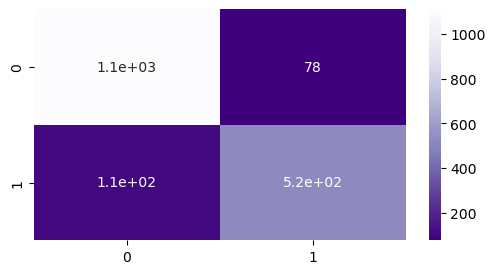

In [171]:
#Plotting the Confusion Matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,y_predict), cmap="Purples_r", annot=True)
plt.show()

In [172]:
#Printing classification report
from sklearn.metrics import classification_report

In [173]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8986225895316804

In [174]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1187
           1       0.87      0.83      0.85       628

    accuracy                           0.90      1815
   macro avg       0.89      0.88      0.89      1815
weighted avg       0.90      0.90      0.90      1815



In [175]:
from sklearn import metrics
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_test,y_predict )
confusion2

array([[1109,   78],
       [ 106,  522]], dtype=int64)

In [176]:
# value of true positive
TP = confusion2[1,1]
# value of true negatives
TN = confusion2[0,0]
# value of false positives
FP = confusion2[0,1] 
# value of false negatives
FN = confusion2[1,0]

In [177]:
# Calculating the sensitivity
sensi=TP/(TP+FN)
sensi

0.8312101910828026

In [178]:
# Calculating the specificity
speci=TN/(TN+FP)
speci

0.9342881213142376

## 2. K-Fold Cross Validation

In [179]:
from sklearn.model_selection import KFold
model=LogisticRegression()
kfold_validation=KFold(10)

In [180]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.92621145 0.90528634 0.90418502 0.91960352 0.90959206 0.9106946
 0.91289967 0.93605292 0.91510474 0.88423374]
0.9123864072388519


1. 0.92621145                   
2. 0.90528634
3. 0.90418502
4. 0.91960352
5. 0.90959206
6. 0.9106946
7. 0.91289967
8. 0.93605292
9. 0.91510474
10. 0.88423374                                                                                                         
mean of all : 0.9123864072388519

## 3. Cross Validation

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
cross_score=cross_val_score(lr,X,y,cv=15)
print(cross_score)
print(print("average of all samples = ",np.mean(cross_score)))

[0.93553719 0.90247934 0.91239669 0.87438017 0.92396694 0.89752066
 0.87438017 0.90247934 0.89752066 0.93057851 0.90247934 0.92231405
 0.89752066 0.87603306 0.87417219]
average of all samples =  0.9015839308193312
None


# *ROC*

In [183]:
from sklearn.metrics import roc_curve

In [184]:
y_predict_prob=lr.predict_proba(X_test)

In [185]:
y_predict_prob=y_predict_prob[:,1]

In [186]:
fpr,tpr,threshold=roc_curve(y_test,y_predict_prob)

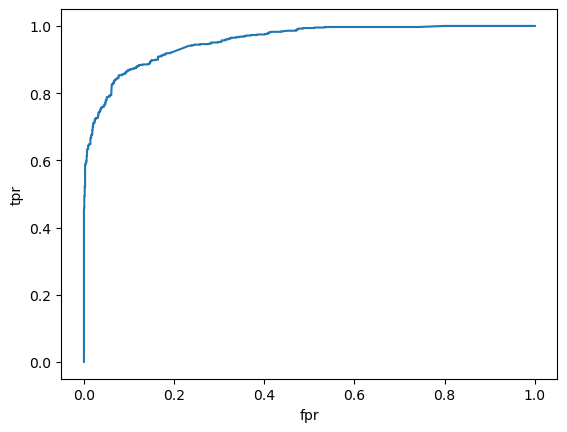

In [187]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

#### The ROC curve represents the true positive rate and the false positive rate at different classification thresholds and the AUC represents the aggregate measure of the machine learning model across all possible classification thresholds.the ROC curve and the area under the curve in the above figure is AUC. Whenever the AUC equals 1 then it is the ideal situation for a machine learning model. Below is how the AUC and ROC curve looks when the AUC is equal to 1.

In [188]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict_prob)

0.9547177759056444

#### Logistic Regression Model - Summary for Coefficients

In [189]:
# Importing statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7179
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.2
Date:                Mon, 23 Jan 2023   Deviance:                       2688.3
Time:                        20:46:12   Pearson chi2:                 2.06e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6187
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Total_Visits                                               0.0946      0.029      3.311      0.001       0.039       0.151
Time_Website                                               0.0020      0.000     18.208      0.000       0.002       0.002
Page_Views                                                -0.1403      0.051     -2.730      0.006      -0.241      -0.040
Lead_Origin_Landing Page Submission                       -0.5008      0.236     -2.118      0.034      -0.964      -0.037
Lead_Origin_Lead Add Form                                  0.0790      1.706      0.046      0.963      -3.265       3.423
Lead_Origin_Lead Import                                    0.1029      1.291      0.080      0.936      -2.427       2.633
Lead_Source_Google                                         0.1056      0.176      0.602      0.547      -0.238       0.450
Lead_Source_Olark Chat                                     1.0159      0.236      4.304      0.000       0.553       1.479
Lead_Source_Organic Search                                -0.0329      0.204     -0.162      0.872      -0.432       0.366
Lead_Source_Others                                         0.6481      0.856      0.757      0.449      -1.030       2.327
Lead_Source_Reference                                      0.8184      1.767      0.463      0.643      -2.644       4.281
Lead_Source_Referral Sites                                -0.2718      0.460     -0.591      0.555      -1.173       0.630
Lead_Source_Welingak Website                               5.1850      1.863      2.783      0.005       1.533       8.837
Last_Activity_Email Bounced                               -2.3987      0.798     -3.006      0.003      -3.963      -0.835
Last_Activity_Email Link Clicked                           0.4870      0.678      0.719      0.472      -0.841       1.815
Last_Activity_Email Opened                                 0.1479      0.392      0.377      0.706      -0.620       0.916
Last_Activity_Form Submitted on Website                    0.8710      0.577      1.510      0.131      -0.259       2.001
Last_Activity_Had a Phone Conversation                     3.4238      1.840      1.861      0.063      -0.183       7.030
Last_Activity_Olark Chat Conversation                     -0.5095      0.391     -1.303      0.192      -1.276       0.257
Last_Activity_Others                                       2.0334      1.301      1.563      0.118      -0.516       4.583
Last_Activity_Page Visited on Website                     -0.0426      0.459     -0.093      0.926      -0.943       0.858
Last_Activity_SMS Sent                                     1.3246      0.362      3.658      0.000       0.615       2.034
Last_Act

# *Decision Tree Model*

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
dt=DecisionTreeClassifier()

In [192]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [193]:
#Predicting the values for testing dataset 
y_predict_dt=dt.predict(X_test)
y_predict_dt

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [194]:
result=lr.score(X_test,y_test)
print(result)

0.8986225895316804


# *Evaluation of Model*

## 1. Confusion Matrix

In [195]:
confusion_dt=confusion_matrix(y_test,y_predict_dt)
confusion_dt

array([[1115,   72],
       [  91,  537]], dtype=int64)

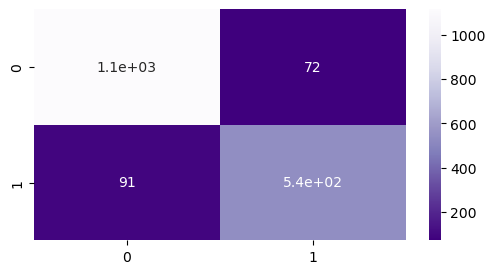

In [196]:
#Plotting the Confusion Matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_dt, cmap="Purples_r", annot=True)
plt.show()

In [197]:
#Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_dt)

0.9101928374655648

In [198]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1187
           1       0.88      0.86      0.87       628

    accuracy                           0.91      1815
   macro avg       0.90      0.90      0.90      1815
weighted avg       0.91      0.91      0.91      1815



In [199]:
# value of true positive
TP_d = confusion_dt[1,1]
# value of true negatives
TN_d = confusion_dt[0,0]
# value of false positives
FP_d = confusion_dt[0,1] 
# value of false negatives
FN_d = confusion_dt[1,0]

In [200]:
# Calculating the sensitivity
sensitivity=TP_d/(TP_d+FN_d)
sensitivity

0.8550955414012739

## 2. K-Fold Cross Validation

In [201]:
from sklearn.model_selection import KFold
model_dt=DecisionTreeClassifier()
kfold_validation=KFold(10)
print(np.mean(results))

0.9123864072388519


In [202]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(model_dt,X,y,cv=kfold_validation)
print(results)
print("average of all 10 folds = ",np.mean(result))

[0.92621145 0.90528634 0.90418502 0.91960352 0.90959206 0.9106946
 0.91289967 0.93605292 0.91510474 0.88423374]
average of all 10 folds =  0.9008187664226842


## 3. Cross Validation

In [203]:
from sklearn.model_selection import cross_val_score
cross_scr=cross_val_score(dt,X,y,cv=15)
print(cross_score)
print(print("average of all samples = ",np.mean(cross_scr)))

[0.93553719 0.90247934 0.91239669 0.87438017 0.92396694 0.89752066
 0.87438017 0.90247934 0.89752066 0.93057851 0.90247934 0.92231405
 0.89752066 0.87603306 0.87417219]
average of all samples =  0.905882546111324
None


# ROC

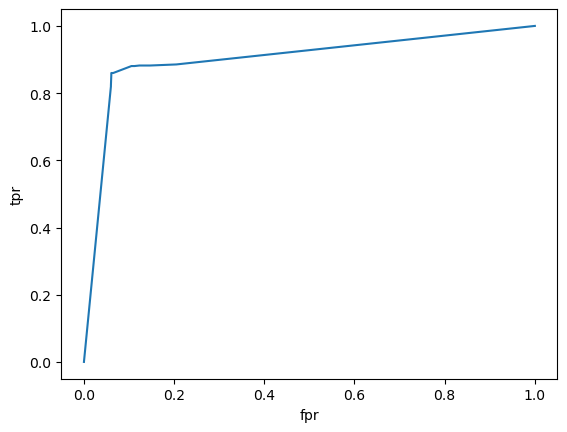

In [204]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
y_predict_prob_dt=dt.predict_proba(X_test)
y_predict_prob_dt=y_predict_prob_dt[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_predict_prob_dt)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [205]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict_prob_dt)

0.9015066350431158

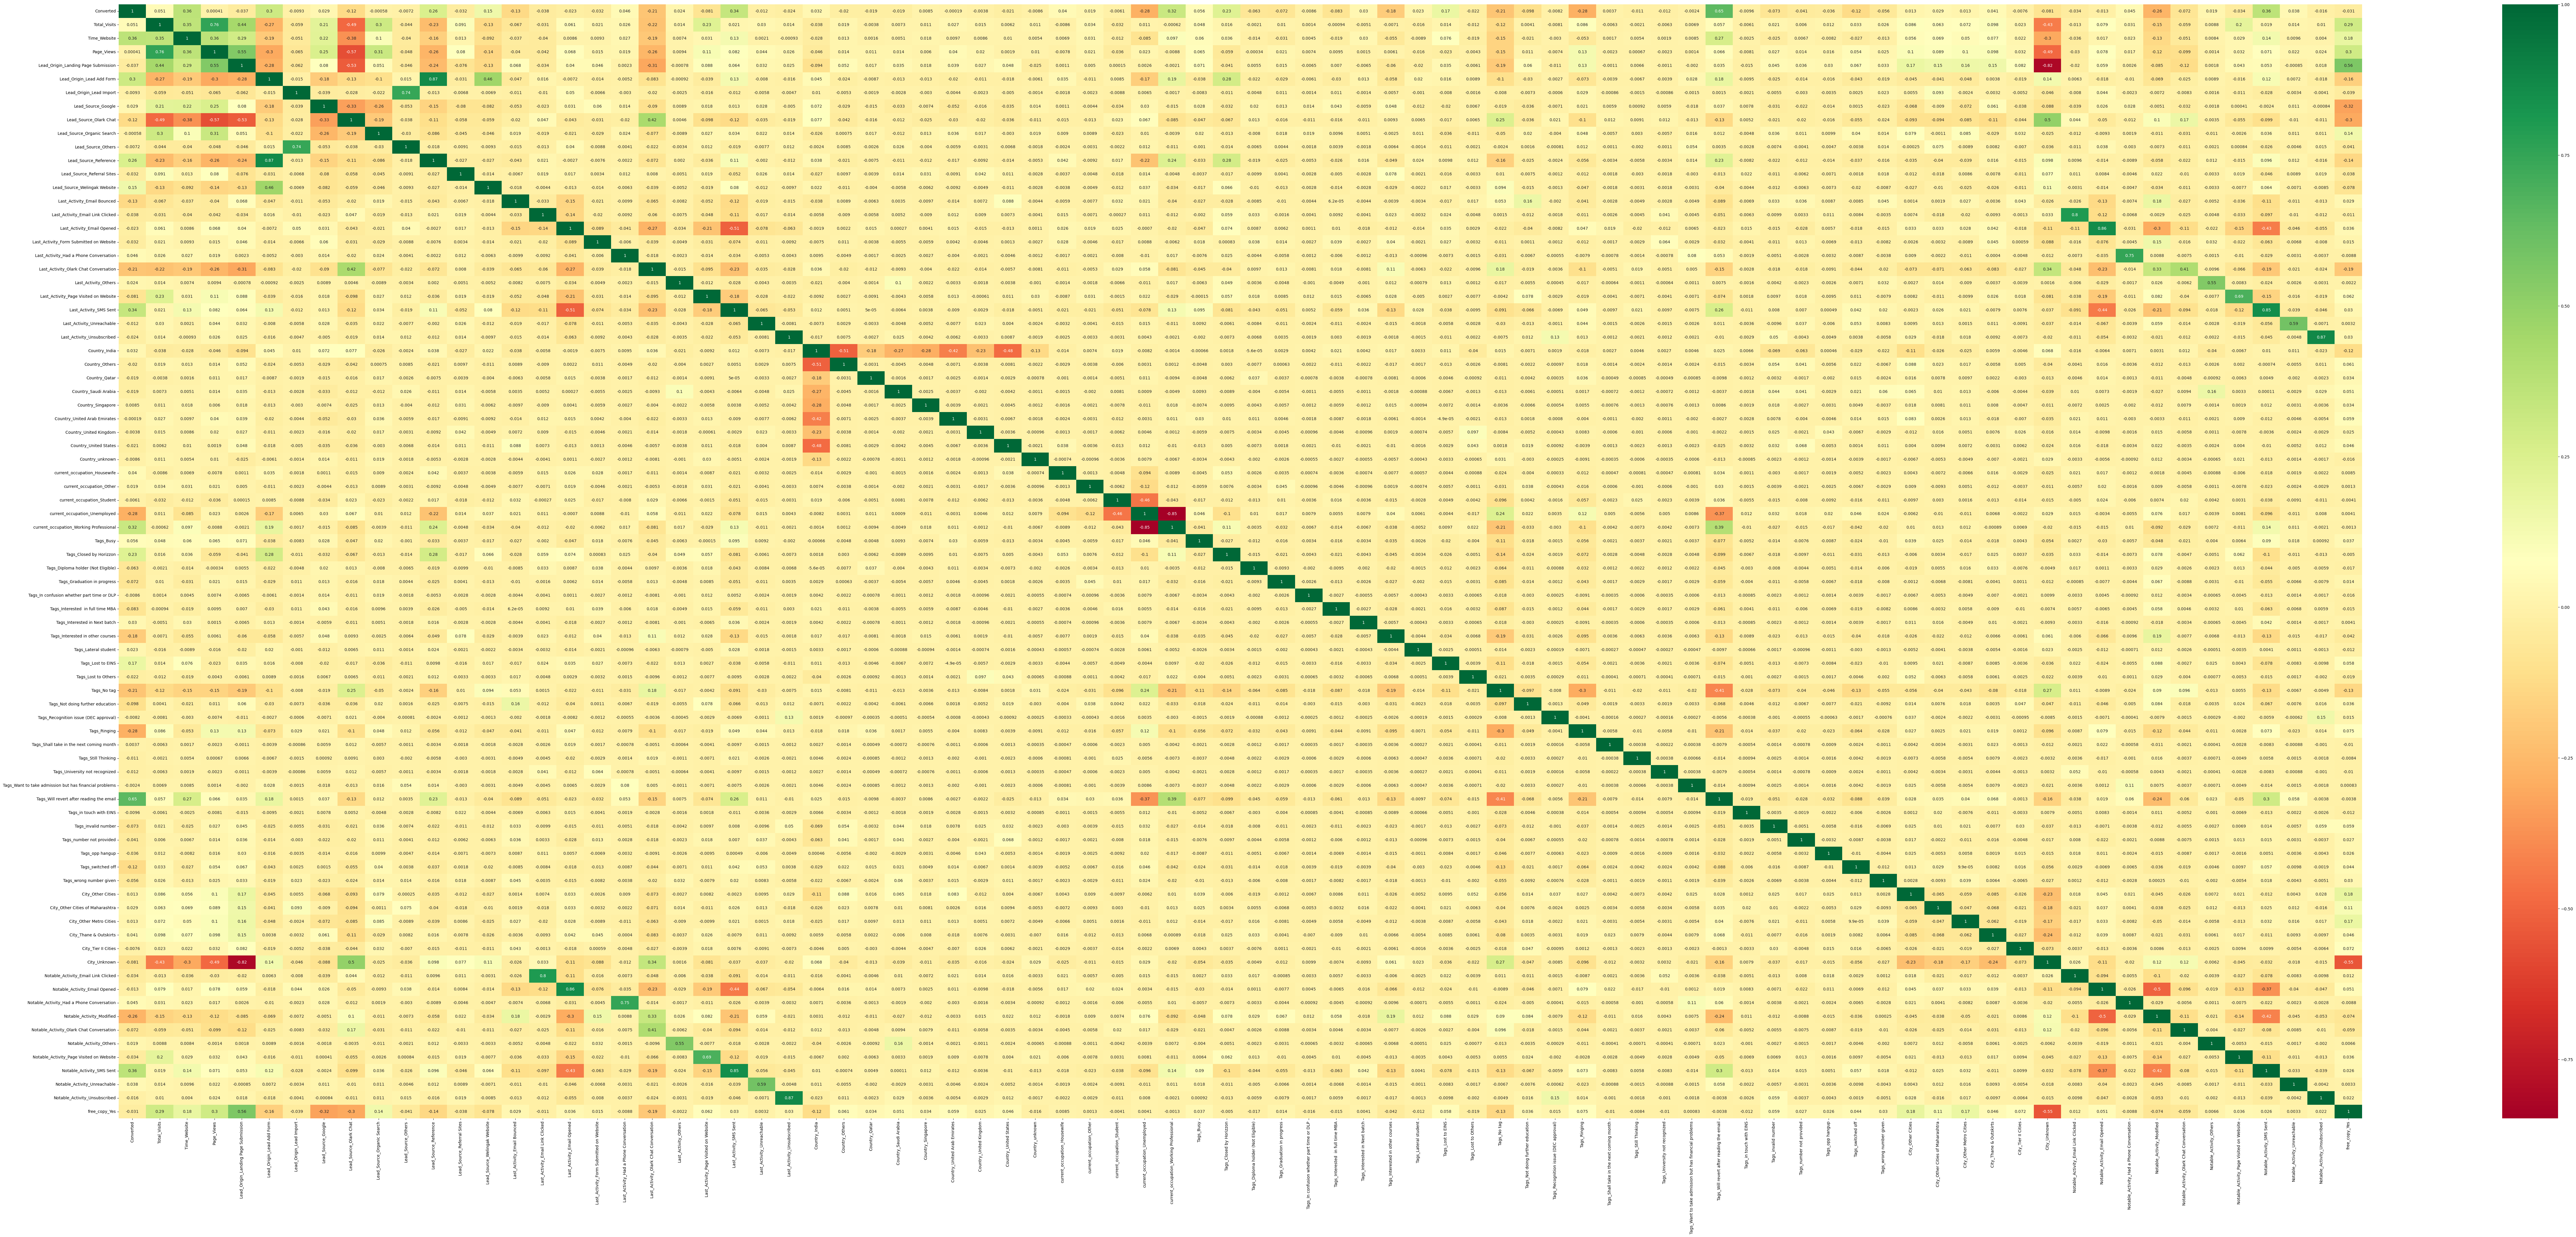

In [206]:
corrmat = df_c.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(125,50))

#plot heat map
g=sns.heatmap(df_c[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##### This means our decision models false negative value is more than logistic regression model.

# Conclusions:

#### We have designed two models 1. is Logistic Regression and another is 2. Decision Tree and among them we have selected regression model

#### 1. Our final Logistic Regression Model is built with 13 features,Here the logistic regression model is used to predict the probability of conversion of a customer.

#### 2. Features used in final model are'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity','Country', 'What is your current occupation', 'Tags', 'City','A free copy of Mastering The Interview', 'Last Notable Activity'.

#### 3. The final model has accuracy score of 0.8991 i.e. 89.91% and sensitivity is 83.12%

#### 4. The top three categorical variables/dummy variables in the final model are Tags_Lateral student, Tags_Interested in Next batch,  current_occupation_Housewife